In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

/kaggle/input/smart-construction-cost-estimation-india-data-csv/smart_construction_cost_estimation_india_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/smart-construction-cost-estimation-india-data-csv/smart_construction_cost_estimation_india_data.csv')


In [3]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (optional, based on your dataset needs)
data.dropna(inplace=True)

In [4]:
data.head()

,Project_ID,Project_Type,Location,Material_Cost,Labor_Cost,Project_Size (sq.ft),Duration (days),Complexity,Inflation_Rate (%),Weather_Impact,Total_Cost
0,1,Commercial,"Mumbai, MH",6107358,6809779,8224,308,Medium,4.1,Low,13450180
1,2,Industrial,"Mumbai, MH",5717604,3113565,10759,157,Medium,3.6,Moderate,9224771
2,3,Residential,"Jaipur, RJ",1289870,6930567,2326,214,Low,4.8,High,8554710
3,4,Commercial,"Jaipur, RJ",2108015,3321837,18254,88,Low,5.0,Low,6423282
4,5,Commercial,"Lucknow, UP",7584055,1510953,12239,211,High,6.3,Low,9452743


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project_ID            3000 non-null   int64  
 1   Project_Type          3000 non-null   object 
 2   Location              3000 non-null   object 
 3   Material_Cost         3000 non-null   int64  
 4   Labor_Cost            3000 non-null   int64  
 5   Project_Size (sq.ft)  3000 non-null   int64  
 6   Duration (days)       3000 non-null   int64  
 7   Complexity            3000 non-null   object 
 8   Inflation_Rate (%)    3000 non-null   float64
 9   Weather_Impact        3000 non-null   object 
 10  Total_Cost            3000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 257.9+ KB


In [6]:
data.describe()

,Project_ID,Material_Cost,Labor_Cost,Project_Size (sq.ft),Duration (days),Inflation_Rate (%),Total_Cost
count,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,1500.500000,5.202680e+06,3.616483e+06,10187.557667,196.934333,5.014300,9.417513e+06
std,866.169729,2.723807e+06,1.934635e+06,5733.322129,96.425446,1.163536,3.352442e+06
min,1.000000,5.004430e+05,3.018030e+05,500.000000,30.000000,3.000000,1.486802e+06
25%,750.750000,2.895327e+06,1.980848e+06,5155.500000,113.000000,4.000000,6.991803e+06
50%,1500.500000,5.155612e+06,3.607734e+06,9956.500000,198.000000,5.000000,9.361909e+06
75%,2250.250000,7.567962e+06,5.288357e+06,15270.500000,280.000000,6.000000,1.185492e+07
max,3000.000000,9.995496e+06,6.997956e+06,19998.000000,364.000000,7.000000,1.737797e+07


> # Data Analysis and Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


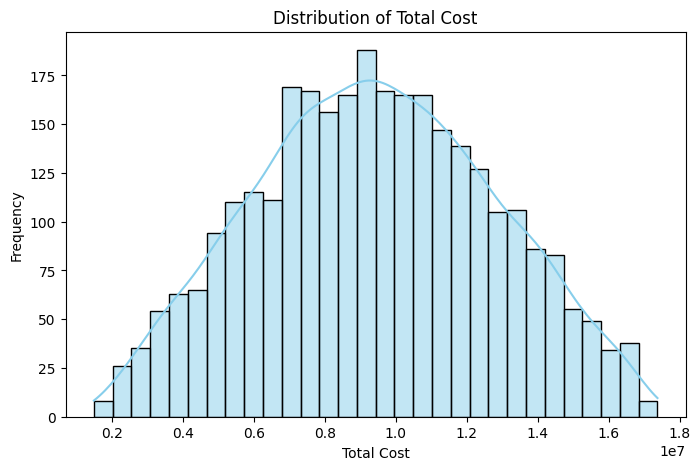

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Total_Cost"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Total Cost")
plt.xlabel("Total Cost")
plt.ylabel("Frequency")
plt.show()


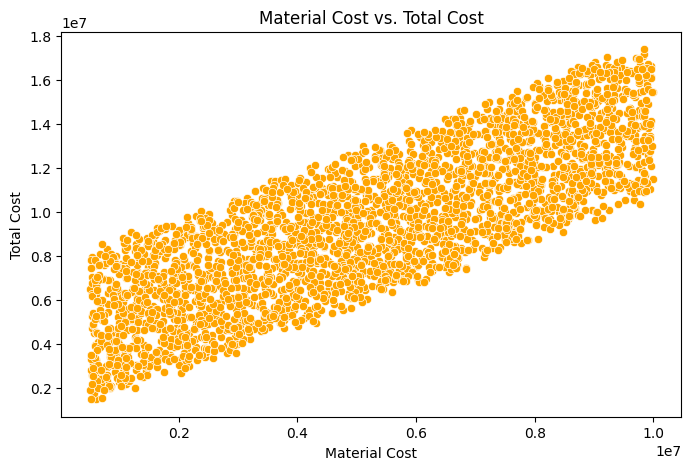

In [8]:
# 2. Material Cost vs. Total Cost
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Material_Cost"], y=data["Total_Cost"], color="orange")
plt.title("Material Cost vs. Total Cost")
plt.xlabel("Material Cost")
plt.ylabel("Total Cost")
plt.show()

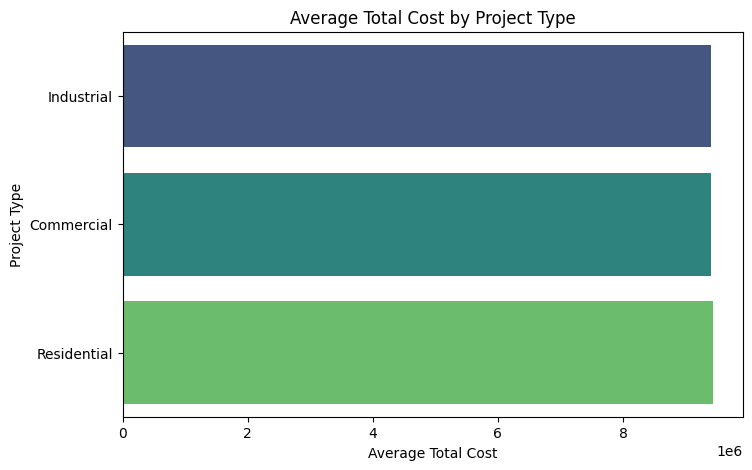

In [9]:
# 3. Average Total Cost by Project Type
plt.figure(figsize=(8, 5))
avg_cost_by_type = data.groupby("Project_Type")["Total_Cost"].mean().sort_values()
sns.barplot(x=avg_cost_by_type, y=avg_cost_by_type.index, palette="viridis")
plt.title("Average Total Cost by Project Type")
plt.xlabel("Average Total Cost")
plt.ylabel("Project Type")
plt.show()

# Separate features and target variable


In [10]:
X = data.drop(columns=["Project_ID", "Total_Cost"])
y = data["Total_Cost"]


# Define categorical and numerical features


In [11]:
categorical_features = ["Project_Type", "Location", "Complexity", "Weather_Impact"]
numerical_features = ["Material_Cost", "Labor_Cost", "Project_Size (sq.ft)", "Duration (days)", "Inflation_Rate (%)"]


# Preprocessing pipelines for both numerical and categorical data


In [12]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define the model pipeline


In [13]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

 Split data into training and testing sets


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Material_Cost',
                                                   'Labor_Cost',
                                                   'Project_Size (sq.ft)',
                                                   'Duration (days)',
                                                   'Inflation_Rate (%)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Project_Type', 'Location',
                                                   'Complexity',
                                                   'Weather_Impact'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [16]:
# Function to predict construction cost
def predict_construction_cost(input_data):
    input_df = pd.DataFrame([input_data])  # Convert input data to a DataFrame
    prediction = model.predict(input_df)[0]
    return prediction

In [17]:
# Example input (you can customize this with your own values)
example_input = {
    "Material_Cost": 500000,
    "Labor_Cost": 200000,
    "Project_Size (sq.ft)": 1200,
    "Duration (days)": 60,
    "Inflation_Rate (%)": 3.5,
    "Project_Type": "Residential",
    "Location": "Urban",
    "Complexity": "Medium",
    "Weather_Impact": "Moderate"
}


In [18]:
# Predict the construction cost
predicted_cost = predict_construction_cost(example_input)
print(f"\nPredicted Construction Cost: ₹{predicted_cost:,.2f}")


Predicted Construction Cost: ₹1,717,608.43


In [19]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")



Model Performance:
Mean Squared Error (MSE): 73612718810.64
R² Score: 0.9935


In [20]:
# Feature Importance Visualization
print("\nVisualizing Feature Importance...")
feature_names = numerical_features + list(model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_features))
feature_importances = model.named_steps["regressor"].feature_importances_


Visualizing Feature Importance...


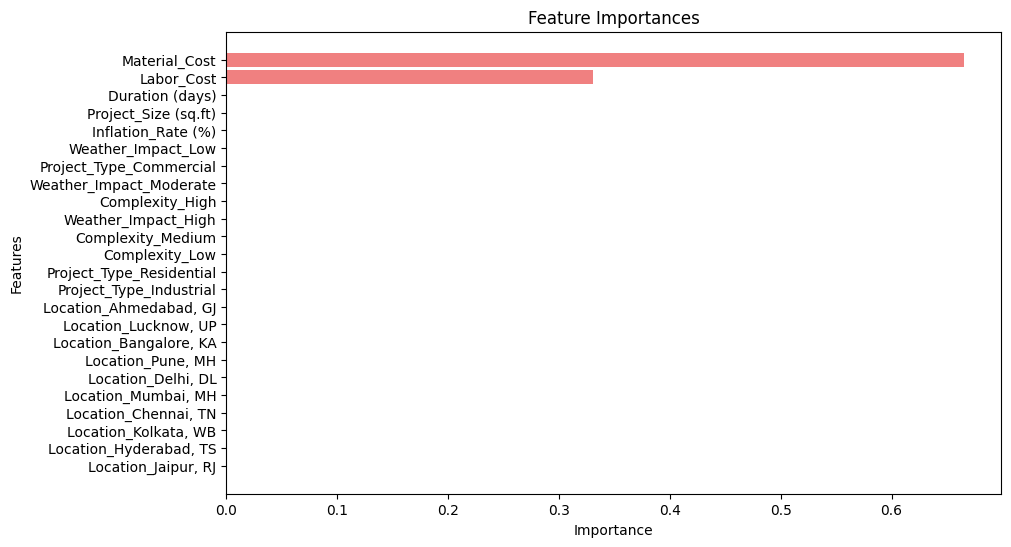

In [21]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importances)
plt.barh(np.array(feature_names)[sorted_idx], feature_importances[sorted_idx], color="lightcoral")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()